In [ ]:
from google.colab import drive
import pandas as pd
import io
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import urllib.request
import datetime
from collections import namedtuple

pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 800)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving best_NEW_2_WITH_REGRESSION_xgboost_1hSeq_AllSeq_Labelled_1or0_OVERSAMPLING_1.csv to best_NEW_2_WITH_REGRESSION_xgboost_1hSeq_AllSeq_Labelled_1or0_OVERSAMPLING_1 (2).csv


In [ ]:
df_best_classification = pd.read_csv(io.BytesIO(uploaded['best_NEW_2_WITH_REGRESSION_xgboost_1hSeq_AllSeq_Labelled_1or0_OVERSAMPLING_1.csv']))

print(df_best_classification.sort_values("BALANCED_ACCURACY", ascending=False)) #-- 96324 ,   87481



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Best_NEW_REGRESSION_xgboost_top_16feat.csv to Best_NEW_REGRESSION_xgboost_top_16feat (1).csv


In [ ]:
df_best_regression = pd.read_csv(io.BytesIO(uploaded['Best_NEW_REGRESSION_xgboost_top_16feat.csv']))
print(df_best_regression.sort_values("RMSE",ascending=True))
#89906 -- 2.379381 -0.100937   283.072815
#, 73299 --  3.662681 -0.459964   174.398051

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Best_REGRESSION_xgboost_top_16feat_INDIV_PATIENT.csv to Best_REGRESSION_xgboost_top_16feat_INDIV_PATIENT (1).csv


In [ ]:
df_best_regression_indiv = pd.read_csv(io.BytesIO(uploaded['Best_NEW_REGRESSION_xgboost_top_16feat_INDIV_PATIENT.csv']))
print(df_best_regression_indiv.columns)

#print(df_best_regression_indiv[['SOFA_SCORE','PRED_SOFA_SCORE']])

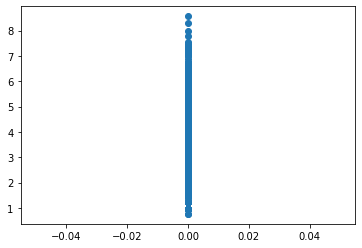

In [ ]:
import matplotlib.pyplot as plt
df_best_regression_indiv['RESIDUAL'] = df_best_regression_indiv['SOFA_SCORE'] - df_best_regression_indiv['PRED_SOFA_SCORE'] 

plt.scatter(df_best_regression_indiv.RESIDUAL,df_best_regression_indiv.PRED_SOFA_SCORE)

plt.show()


In [ ]:
drive.mount('/content/gdrive') # 73299 ,  44319, 72439 df_all256_withTemp


In [ ]:
# Download All Time series data for 404 patients.

df_all256_withTemp = pd.read_csv('/content/gdrive/My Drive/Master thesis/df_ts_records_all236SepsisPatients(lessThan20%Missing)_fromSepsisOnset_ShockOnsetPlus10h_or_sepsisOnsetPlus41h_WITH_TEMP_SOFA.csv')
df_all256_withTemp['TIME'] =  pd.to_datetime(df_all256_withTemp['TIME'])
print(df_all256_withTemp.shape)
print(df_all256_withTemp.columns)




In [ ]:
#cleaning data :  removing all negative values

df_all256_withTemp.HR = df_all256_withTemp.HR.mask(df_all256_withTemp.HR < 0)

df_all256_withTemp.RESP = df_all256_withTemp.RESP.mask(df_all256_withTemp.RESP < 0)

df_all256_withTemp.ABPSYS = df_all256_withTemp.ABPSYS.mask(df_all256_withTemp.ABPSYS < 0)

df_all256_withTemp.ABPDIAS = df_all256_withTemp.ABPDIAS.mask(df_all256_withTemp.ABPDIAS < 0)

df_all256_withTemp.ABPMEAN = df_all256_withTemp.ABPMEAN.mask(df_all256_withTemp.ABPMEAN < 0)

df_all256_withTemp.SPO2 = df_all256_withTemp.SPO2.mask(df_all256_withTemp.SPO2 < 0)

df_all256_withTemp.TEMP = df_all256_withTemp.TEMP.mask(df_all256_withTemp.TEMP < 0)


df_all256_withTemp.SOFA_SCORE = df_all256_withTemp.SOFA_SCORE.mask(df_all256_withTemp.SOFA_SCORE < 0)


df_all256_withTemp.RESP_SOFA = df_all256_withTemp.RESP_SOFA.mask(df_all256_withTemp.RESP_SOFA < 0)


df_all256_withTemp.LIVER_SOFA = df_all256_withTemp.LIVER_SOFA.mask(df_all256_withTemp.LIVER_SOFA < 0)


df_all256_withTemp.RENAL_SOFA = df_all256_withTemp.RENAL_SOFA.mask(df_all256_withTemp.RENAL_SOFA < 0)


df_all256_withTemp.CARDIO_SOFA = df_all256_withTemp.CARDIO_SOFA.mask(df_all256_withTemp.CARDIO_SOFA < 0)


df_all256_withTemp.CNS_SOFA = df_all256_withTemp.CNS_SOFA.mask(df_all256_withTemp.CNS_SOFA < 0)


df_all256_withTemp.COAG_SOFA = df_all256_withTemp.COAG_SOFA.mask(df_all256_withTemp.COAG_SOFA < 0)

from numpy import nan
df_all256_withTemp.RESP = df_all256_withTemp.RESP.mask(df_all256_withTemp.RESP == 0 , other=nan)
df_all256_withTemp.HR = df_all256_withTemp.HR.mask(df_all256_withTemp.HR < 1 ,other=nan)


In [ ]:
# Missing value imputation by carry forward scheme
df_all256_withTemp_cleaned_MVimputed = df_all256_withTemp.ffill().bfill()

df_all256_withTemp_cleaned_MVimputed.HR = df_all256_withTemp_cleaned_MVimputed.HR.round(decimals=4)
df_all256_withTemp_cleaned_MVimputed.RESP = df_all256_withTemp_cleaned_MVimputed.RESP.round(decimals=4)
df_all256_withTemp_cleaned_MVimputed.ABPSYS = df_all256_withTemp_cleaned_MVimputed.ABPSYS.round(decimals=4)
df_all256_withTemp_cleaned_MVimputed.ABPDIAS = df_all256_withTemp_cleaned_MVimputed.ABPDIAS.round(decimals=4)
df_all256_withTemp_cleaned_MVimputed.ABPMEAN = df_all256_withTemp_cleaned_MVimputed.ABPMEAN.round(decimals=4)
df_all256_withTemp_cleaned_MVimputed.SPO2 = df_all256_withTemp_cleaned_MVimputed.SPO2.round(decimals=4)
df_all256_withTemp_cleaned_MVimputed.TEMP = df_all256_withTemp_cleaned_MVimputed.TEMP.round(decimals=4)


df_all256_withTemp_cleaned_MVimputed.SOFA_SCORE = df_all256_withTemp_cleaned_MVimputed.SOFA_SCORE.round(decimals=4)

df_all256_withTemp_cleaned_MVimputed.RENAL_SOFA = df_all256_withTemp_cleaned_MVimputed.RENAL_SOFA.round(decimals=4)

df_all256_withTemp_cleaned_MVimputed.LIVER_SOFA = df_all256_withTemp_cleaned_MVimputed.LIVER_SOFA.round(decimals=4)

df_all256_withTemp_cleaned_MVimputed.COAG_SOFA = df_all256_withTemp_cleaned_MVimputed.COAG_SOFA.round(decimals=4)

df_all256_withTemp_cleaned_MVimputed.CARDIO_SOFA = df_all256_withTemp_cleaned_MVimputed.CARDIO_SOFA.round(decimals=4)

df_all256_withTemp_cleaned_MVimputed.CNS_SOFA = df_all256_withTemp_cleaned_MVimputed.CNS_SOFA.round(decimals=4)

df_all256_withTemp_cleaned_MVimputed.RESP_SOFA = df_all256_withTemp_cleaned_MVimputed.RESP_SOFA.round(decimals=4)

df_all256_withTemp_cleaned_MVimputed['TIME'] =  pd.to_datetime(df_all256_withTemp_cleaned_MVimputed['TIME'])

In [ ]:
print(df_all256_withTemp_cleaned_MVimputed[df_all256_withTemp_cleaned_MVimputed.isnull().any(axis=1)])


Empty DataFrame
Columns: [SUBJECT_ID, ICUSTAY_ID, RECORD, TIME, HR, SPO2, ABPSYS, ABPDIAS, ABPMEAN, RESP, TEMP, SOFA_SCORE, RESP_SOFA, LIVER_SOFA, RENAL_SOFA, CARDIO_SOFA, CNS_SOFA, COAG_SOFA]
Index: []


#**Extracting Features** 

In [ ]:
subject_ids = df_all256_withTemp_cleaned_MVimputed.SUBJECT_ID.unique()

print(len(subject_ids))

for i in [69272, 84063, 86144, 82055, 58483 ,98769, 77070, 85895, 85541, 52710, 44827, 88111 , 95603, 62835, 50182, 69903, 42621]:
    subject_ids = np.delete(subject_ids,np.where(subject_ids==i))

print(subject_ids)
print(len(subject_ids))


236
[80847 51871 71405 96350 89734 66965 89091 88883 43601 83182 68425 90544
 85892 70427 41782 80134 43770 53348 50050 41013 86300 78474 59268 47733
 77524 99863 48690 53567 48327 55094 44789 96324 97243 99366 78431 88809
 77975 64099 74696 40227 87577 44600 99982 44976 55716 73429 86531 55638
 98046 78473 72455 89906 75013 83908 74820 59964 70393 72627 58187 88994
 54088 78143 81103 40934 61207 86645 66483 47547 79875 44319 84223 79297
 77815 49311 84468 62824 90959 84912 85725 98564 95632 94162 40828 61823
 95530 72408 90208 79532 55730 64771 89579 73770 49304 85889 65760 78251
 84854 53036 81242 46550 44018 42904 43738 97273 80678 54420 57283 87608
 58812 75138 96336 55849 73946 58327 63486 66507 96008 87936 80885 69522
 45703 72439 77686 82746 47058 97382 66603 57023 77951 40084 60295 95354
 65871 46728 97813 46723 54968 47275 61898 97738 66772 80779 49038 83752
 91581 71862 40867 77875 53612 66206 57619 48688 72172 98948 50579 89292
 86254 86984 52462 54911 96171 49520 45138 8119

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Only_AllSepsisPatients_with_MissingData_FromSepsisOnset_ToShockOnsetPlus10h_or_SepsisOnset+41h.csv to Only_AllSepsisPatients_with_MissingData_FromSepsisOnset_ToShockOnsetPlus10h_or_SepsisOnset+41h (2).csv


In [ ]:
df_icutime = pd.read_csv(io.BytesIO(uploaded['Only_AllSepsisPatients_with_MissingData_FromSepsisOnset_ToShockOnsetPlus10h_or_SepsisOnset+41h.csv']))
print (df_icutime.columns)
#df_icutime = df_icutime[['subject_id','icustay_id','intime','outtime','sepsis_onsettime']]
#print (df_icutime.columns)
"""
df_icutime['intime'] =  pd.to_datetime(df_icutime['intime'])
df_icutime['outtime'] =  pd.to_datetime(df_icutime['outtime'])
"""


Index(['hadm_id', 'icustay_id', 'subject_id', 'intime', 'outtime', 'suspected_infection_time_poe', 'sepsis_onsettime', 'sepstic_shock_onsettime', 'Sepsis_SepsisOnset+ShockOnsetOR31h_timeoverlap_exists', 'Sepsis_SepsisOnset+ShockOnsetOR31h_overlap_duration', 'Sepsis_SepsisOnset+ShockOnsetOR31h_Number_of_overlaping_records', 'gap_SO_ShockOnsetORSOplus31', 'Sepsis_SepsisOnset+ShockOnsetOR31h_percentNonMissingData'], dtype='object')


"\ndf_icutime['intime'] =  pd.to_datetime(df_icutime['intime'])\ndf_icutime['outtime'] =  pd.to_datetime(df_icutime['outtime'])\n"

In [ ]:
import scipy
import collections
from scipy.stats import entropy

feature_cols= ['TIME','ICUSTAY_ID','SUBJECT_ID','SEPSIS_ONSETTIME','SEPSIS_SHOCK_ONSETTIME','HAS_SHOCK','HOURS_BETWEEN_SEPSIS_SHOCK','WINDOW',
               'HR',
               'RESP',
               'ABPSYS',
               'ABPDIAS',
               'ABPMEAN',
               'SPO2',
               'TEMP' ,
               'SOFA_SCORE'] 
              



temp_feature_cols= ['TIME',
               'HR',
               'RESP',
               'ABPSYS',
               'ABPDIAS',
               'ABPMEAN',
               'SPO2',
               'TEMP',
               'SOFA_SCORE'
               ] 

def gen_sequence(id_df, seq_length, seq_cols):
  data_matrix = id_df[seq_cols].values
  # print(data_matrix)
  num_elements = data_matrix.shape[0]
  #print(num_elements)
  for start, stop in zip(range(0, num_elements - seq_length,15), range(seq_length, num_elements,15)):
      yield data_matrix[start:stop, :]

test_subject_ids = df_best_classification.SUBJECT_ID.unique()


if __name__ == '__main__':

  try:
    df_features_sequences.drop(df_features_sequences.index, inplace=True)
  except:
    print('df_features_sequences does not exists')

  df_features_sequences  =  pd.DataFrame(columns=feature_cols);

  for subject_id in test_subject_ids:
    
    icustay_id = df_icutime.loc[df_icutime.subject_id==subject_id , 'icustay_id'].values[0]

    icu_intime = df_icutime.loc[df_icutime.subject_id==subject_id , 'intime'].values[0]
    sepsis_onsettime = df_icutime.loc[df_icutime.subject_id==subject_id , 'sepsis_onsettime'].values[0]

    shock_onsetttime = df_icutime.loc[df_icutime.subject_id==subject_id , 'sepstic_shock_onsettime'].values[0]
    

    if str(shock_onsetttime) == 'nan':
      
      has_shock = 0 ;
      #print('not a shock patient')
      df_tsdata_subjectid_entireTimeBeforeShock = df_all256_withTemp_cleaned_MVimputed[(df_all256_withTemp_cleaned_MVimputed['SUBJECT_ID'] == subject_id) & ( ( df_all256_withTemp_cleaned_MVimputed['TIME'] >= datetime.datetime.strptime(sepsis_onsettime,'%Y-%m-%d %H:%M:%S')    ) & ( df_all256_withTemp_cleaned_MVimputed['TIME'] <= ( datetime.datetime.strptime(sepsis_onsettime,'%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours=31) ) )  )]
      skip = 31

    else:
      has_shock = 1 ;

      datetime_shock = datetime.datetime.strptime(shock_onsetttime,'%Y-%m-%d %H:%M:%S')
      datetime_shock_date = datetime.datetime.strptime(shock_onsetttime,'%Y-%m-%d %H:%M:%S').date()
      datetime_shock_time_hour  = datetime.datetime.strptime(shock_onsetttime,'%Y-%m-%d %H:%M:%S').time().hour

      df_tsdata_subjectid_entireTimeBeforeShock = df_all256_withTemp_cleaned_MVimputed[(df_all256_withTemp_cleaned_MVimputed['SUBJECT_ID'] == subject_id) & ( ( df_all256_withTemp_cleaned_MVimputed['TIME'] >= datetime.datetime.strptime(sepsis_onsettime,'%Y-%m-%d %H:%M:%S')    ) & ( df_all256_withTemp_cleaned_MVimputed['TIME'] <= (datetime.datetime.strptime(shock_onsetttime,'%Y-%m-%d %H:%M:%S') ) )  )]
      
      hours_between = ( datetime.datetime.strptime(shock_onsetttime,'%Y-%m-%d %H:%M:%S') ) - datetime.datetime.strptime(sepsis_onsettime,'%Y-%m-%d %H:%M:%S') 
      
      duration_in_s = hours_between.total_seconds()
      q, r = divmod(duration_in_s, 3600)
      skip = int(q + int(bool(r)))
      


    sequences =  np.asarray(list(gen_sequence(df_tsdata_subjectid_entireTimeBeforeShock, 60, temp_feature_cols)) )
    df_features_sequences_temp = pd.DataFrame(sequences.reshape(-1, 9), columns=temp_feature_cols)
    df_features_sequences_temp.index = np.repeat(np.arange(sequences.shape[0]), sequences.shape[1]) + 1
    df_features_sequences_temp['WINDOW'] = df_features_sequences_temp.index
    df_features_sequences_temp = df_features_sequences_temp.reset_index(drop=True)


    df_features_sequences_temp['SUBJECT_ID'] = subject_id
    df_features_sequences_temp['ICUSTAY_ID'] = icustay_id
    df_features_sequences_temp['SEPSIS_ONSETTIME'] = sepsis_onsettime
    df_features_sequences_temp['SEPSIS_SHOCK_ONSETTIME'] = shock_onsetttime
    df_features_sequences_temp['HAS_SHOCK'] = has_shock
    #df_features_sequences_temp['HAS_SHOCK'] = has_shock_list
    df_features_sequences_temp['HOURS_BETWEEN_SEPSIS_SHOCK'] = skip

    

    icu_intime='';
    sepsis_onsettime='';
    shock_onsetttime = '';
    has_shock ='';
    base_min = '';
    

    
    df_features_sequences = df_features_sequences.append(df_features_sequences_temp);
    df_tsdata_subjectid_entireTimeBeforeShock.drop(df_tsdata_subjectid_entireTimeBeforeShock.index, inplace = True)
    df_features_sequences_temp.drop(df_features_sequences_temp.index, inplace=True) 
    
    

In [ ]:
print(list(df_features_sequences.WINDOW.unique()))
print(df_features_sequences.shape[0])
print(df_features_sequences.loc[598:,:]) #2159-11-28 15:56:14  16:55:14     

In [ ]:
import scipy
import collections
from scipy.stats import entropy

feature_cols= ['TIME','ICUSTAY_ID','SUBJECT_ID','SEPSIS_ONSETTIME','SEPSIS_SHOCK_ONSETTIME','HAS_SHOCK','HOURS_BETWEEN_SEPSIS_SHOCK','WINDOW',
               'HR',
               'RESP',
               'ABPSYS',
               'ABPDIAS',
               'ABPMEAN',
               'SPO2',
               'TEMP' ,
               'SOFA_SCORE',

               'HR_STD',
               'RESP_STD',
               'ABPSYS_STD',
               'ABPDIAS_STD',
               'ABPMEAN_STD',
               'SPO2_STD',
               'TEMP_STD',
               'SOFA_SCORE_STD',
               
               'HR_ENT',
               'RESP_ENT',
               'ABPSYS_ENT',
               'ABPDIAS_ENT',
               'ABPMEAN_ENT',
               'SPO2_ENT',
               'TEMP_ENT',
               'SOFA_SCORE_ENT',

               'ABPDIAS_HR_CORR',
               'RESP_HR_CORR',
               'ABPDIAS_ABPSYS_CORR',
               'ABPMEAN_ABPSYS_CORR',
               'ABPMEAN_ABPDIAS_CORR',

                'HR_MIN',
                'RESP_MIN',
                'SPO2_MIN',
                'TEMP_MIN',
                'SOFA_SCORE_MIN',
                'ABPSYS_MIN',
                'ABPDIAS_MIN',
                'ABPMEAN_MIN',
                'HR_MAX',
                'RESP_MAX',
                'SPO2_MAX',
                'TEMP_MAX',
                'SOFA_SCORE_MAX',
                'ABPSYS_MAX',
                'ABPDIAS_MAX',
                'ABPMEAN_MAX',

               'HR_DIFF',
               'RESP_DIFF',
               'ABPSYS_DIFF',
               'ABPDIAS_DIFF',
               'ABPMEAN_DIFF',
               'SPO2_DIFF',
               'TEMP_DIFF' ,
               'SOFA_SCORE_DIFF'
               ] 
              



temp_feature_cols= ['TIME','WINDOW',
               'HR',
               'RESP',
               'ABPSYS',
               'ABPDIAS',
               'ABPMEAN',
               'SPO2',
               'TEMP',
               'SOFA_SCORE'
               ] 


try:
  df_features.drop(df_features.index, inplace=True)
except:
  print('df_features does not exists')

df_features  =  pd.DataFrame(columns=feature_cols);

for subject_id in test_subject_ids:
  

  icustay_id = df_icutime.loc[df_icutime.subject_id==subject_id , 'icustay_id'].values[0]

  icu_intime = df_icutime.loc[df_icutime.subject_id==subject_id , 'intime'].values[0]
  sepsis_onsettime = df_icutime.loc[df_icutime.subject_id==subject_id , 'sepsis_onsettime'].values[0]

  shock_onsetttime = df_icutime.loc[df_icutime.subject_id==subject_id , 'sepstic_shock_onsettime'].values[0]
  

  df_tsdata_subjectid_entireTimeBeforeShock = df_features_sequences[df_features_sequences['SUBJECT_ID'] == subject_id]
  #first_row_entrie_dataframe = df_tsdata_subjectid_entireTimeBeforeShock.iloc[0,:]
  hours_between = 1 #first_row_entrie_dataframe['HOURS_BETWEEN_SEPSIS_SHOCK']
  
  

  df_tsdata_subjectid_entireTimeBeforeShock = df_tsdata_subjectid_entireTimeBeforeShock[temp_feature_cols]
  
  df_features_temp =pd.DataFrame(columns=temp_feature_cols)

  #For mean calculation
  hr_mean_list = []
  resp_mean_list = []
  spo2_mean_list = []
  temp_mean_list = []
  sofa_mean_list = []
  abpsys_mean_list = []
  abpdias_mean_list = []
  abpmean_mean_list = []

  hr_mean = '';
  resp_mean = '';
  spo2_mean = '';
  temp_mean = '';
  sofa_mean = '';
  abpsys_mean = '';
  abpdias_mean = '';
  abpmean_mean = '';

  # for std calculation
  hr_std_list = []
  resp_std_list = []
  spo2_std_list = []
  temp_std_list = []
  sofa_std_list = []
  abpsys_std_list = []
  abpdias_std_list = []
  abpmean_std_list = []

  hr_std = '';
  resp_std = '';
  spo2_std = '';
  temp_std = '';
  sofa_std = '';
  abpsys_std = '';
  abpdias_std = '';
  abpmean_std = '';


  #for entropy calculation
  hr_entropy_list=[]
  resp_entropy_list = []
  spo2_entropy_list = []
  temp_entropy_list = []
  sofa_entropy_list = []
  abpsys_entropy_list = []
  abpdias_entropy_list = []
  abpmean_entropy_list = []

  hr_entropy = '';
  resp_entropy = '';
  spo2_entropy = '';
  temp_entropy = '';
  sofa_entropy = '';
  abpsys_entropy = '';
  abpdias_entropy = '';
  abpmean_entropy = '';

  # for correlation calculation
  abpdias_hr_corr_list = [];
  resp_hr_corr_list = [];
  abpdias_abpsys_corr_list = [];
  abpmean_abpsys_corr_list = [];
  abpmean_abpdias_corr_list = [];


  # for min calculation
  hr_min_list=[]
  resp_min_list = []
  spo2_min_list = []
  temp_min_list = []
  sofa_min_list = []
  abpsys_min_list = []
  abpdias_min_list = []
  abpmean_min_list = []

  hr_min = '';
  resp_min = '';
  spo2_min = '';
  temp_min = '';
  sofa_min = '';
  abpsys_min = '';
  abpdias_min = '';
  abpmean_min = '';

  # for max calculation
  hr_max_list=[]
  resp_max_list = []
  spo2_max_list = []
  temp_max_list = []
  sofa_max_list = []
  abpsys_max_list = []
  abpdias_max_list = []
  abpmean_max_list = []

  hr_max = '';
  resp_max = '';
  spo2_max = '';
  temp_max = '';
  sofa_max = '';
  abpsys_max = '';
  abpdias_max = '';
  abpmean_max = '';

  #for time
  time_list = [];
  windows_list = [];
  current_windows_list= [];

  windows_list = list(df_tsdata_subjectid_entireTimeBeforeShock.WINDOW.unique())


  for i in windows_list:
    
    first_row = ''
    init_time = ''
    hours_between = ''
    df_subset = df_tsdata_subjectid_entireTimeBeforeShock[df_tsdata_subjectid_entireTimeBeforeShock['WINDOW'] == i] 
    first_row = df_subset.iloc[0,:]
    init_time = first_row['TIME']
    


    hr_mean = '';
    resp_mean = '';
    spo2_mean = '';
    temp_mean = '';
    sofa_mean = '';
    abpsys_mean = '';
    abpdias_mean = '';
    abpmean_mean = '';


    hr_std = '';
    resp_std = '';
    spo2_std = '';
    temp_std = '';
    sofa_std = '';
    abpsys_std = '';
    abpdias_std = '';
    abpmean_std = '';


    hr_entropy = '';
    resp_entropy = '';
    spo2_entropy = '';
    temp_entropy = '';
    sofa_entropy = '';
    abpsys_entropy = '';
    abpdias_entropy = '';
    abpmean_entropy = '';

    abpdias_hr_corr = '';
    resp_hr_corr= '';
    abpdias_abpsys_corr= '';
    abpmean_abpsys_corr= '';
    abpmean_abpdias_corr= '';


    hr_min = '';
    resp_min = '';
    spo2_min = '';
    temp_min = '';
    sofa_min = '';
    abpsys_min = '';
    abpdias_min = '';
    abpmean_min = '';


    hr_max = '';
    resp_max = '';
    spo2_max = '';
    temp_max = '';
    sofa_max = '';
    abpsys_max = '';
    abpdias_max = '';
    abpmean_max = '';


    #extracting series for all vitals + sofa
    hr_series = df_subset.HR
    resp_series = df_subset.RESP
    spo2_series = df_subset.SPO2
    sofa_series =df_subset.SOFA_SCORE
    temp_series = df_subset.TEMP
    abpsys_series = df_subset.ABPSYS
    abpdias_series = df_subset.ABPDIAS
    abpmean_series = df_subset.ABPMEAN

    # other way to calculate the entropy
    #hr_entropy = sample_entropy(hr_series) # from tsfresh package
    #hr_entropy_list.append(hr_entropy)

    
    hr_data = hr_series.value_counts()           # counts occurrence of each value
    hr_entropy = scipy.stats.entropy(hr_data)  # get entropy from counts
    hr_entropy_list.append(hr_entropy) 
    hr_min = hr_series.min()
    hr_min_list.append(hr_min)
    hr_max = hr_series.max()
    hr_max_list.append(hr_max)
    ##### for mean and std
    hr_mean = hr_series.mean()
    hr_mean_list.append(hr_mean)
    hr_std = hr_series.std()
    hr_std_list.append(hr_std)





    resp_data = resp_series.value_counts()           # counts occurrence of each value
    resp_entropy = scipy.stats.entropy(resp_data)  # get entropy from counts
    resp_entropy_list.append(resp_entropy)
    resp_min = resp_series.min()
    resp_min_list.append(resp_min)
    resp_max = resp_series.max()
    resp_max_list.append(resp_max)
    ### for mmean and std
    resp_mean = resp_series.mean()
    resp_mean_list.append(resp_mean)
    resp_std = resp_series.std()
    resp_std_list.append(resp_std)


    spo2_data = spo2_series.value_counts()           # counts occurrence of each value
    spo2_entropy = scipy.stats.entropy(spo2_data)  # get entropy from counts
    spo2_entropy_list.append(spo2_entropy)
    spo2_min = spo2_series.min()
    spo2_min_list.append(spo2_min)
    spo2_max = spo2_series.max()
    spo2_max_list.append(spo2_max)
    ### for mmean and std
    spo2_mean = spo2_series.mean()
    spo2_mean_list.append(spo2_mean)
    spo2_std = spo2_series.std()
    spo2_std_list.append(spo2_std)


    temp_data = temp_series.value_counts()           # counts occurrence of each value
    temp_entropy = scipy.stats.entropy(temp_data)  # get entropy from counts
    temp_entropy_list.append(temp_entropy)
    temp_min = temp_series.min()
    temp_min_list.append(temp_min)
    temp_max = temp_series.max()
    temp_max_list.append(temp_max)
    ### for mmean and std
    temp_mean = temp_series.mean()
    temp_mean_list.append(temp_mean)
    temp_std = temp_series.std()
    temp_std_list.append(temp_std)


    sofa_data = sofa_series.value_counts()           # counts occurrence of each value
    sofa_entropy = scipy.stats.entropy(sofa_data)  # get entropy from counts
    sofa_entropy_list.append(sofa_entropy)
    sofa_min = sofa_series.min()
    sofa_min_list.append(sofa_min)
    sofa_max = sofa_series.max()
    sofa_max_list.append(sofa_max)
    ### for mmean and std
    sofa_mean = sofa_series.mean()
    sofa_mean_list.append(sofa_mean)
    sofa_std = sofa_series.std()
    sofa_std_list.append(sofa_std)

    abpsys_data = abpsys_series.value_counts()           # counts occurrence of each value
    abpsys_entropy = scipy.stats.entropy(abpsys_data)  # get entropy from counts
    abpsys_entropy_list.append(abpsys_entropy)
    abpsys_min = abpsys_series.min()
    abpsys_min_list.append(abpsys_min)
    abpsys_max = abpsys_series.max()
    abpsys_max_list.append(abpsys_max)
    ### for mmean and std
    abpsys_mean = abpsys_series.mean()
    abpsys_mean_list.append(abpsys_mean)
    abpsys_std = abpsys_series.std()
    abpsys_std_list.append(abpsys_std)


    abpdias_data = abpdias_series.value_counts()           # counts occurrence of each value
    abpdias_entropy = scipy.stats.entropy(abpdias_data)  # get entropy from counts
    abpdias_entropy_list.append(abpdias_entropy)
    abpdias_min = abpdias_series.min()
    abpdias_min_list.append(abpdias_min)
    abpdias_max = abpdias_series.max()
    abpdias_max_list.append(abpdias_max)
    ### for mmean and std
    abpdias_mean = abpdias_series.mean()
    abpdias_mean_list.append(abpdias_mean)
    abpdias_std = abpdias_series.std()
    abpdias_std_list.append(abpdias_std)


    abpmean_data = abpmean_series.value_counts()           # counts occurrence of each value
    abpmean_entropy = scipy.stats.entropy(abpmean_data)  # get entropy from counts
    abpmean_entropy_list.append(abpmean_entropy)
    abpmean_min = abpmean_series.min()
    abpmean_min_list.append(abpmean_min)
    abpmean_max = abpmean_series.max()
    abpmean_max_list.append(abpmean_max)
    ### for mmean and std
    abpmean_mean = abpmean_series.mean()
    abpmean_mean_list.append(abpmean_mean)
    abpmean_std = abpmean_series.std()
    abpmean_std_list.append(abpmean_std)

    

    """
    abpdias_hr_corr = abpdias_series.corr(hr_series) 
    abpdias_hr_corr_list.append(abpdias_hr_corr);
    
    resp_hr_corr = resp_series.corr(hr_series) 
    resp_hr_corr_list.append(resp_hr_corr);
    

    abpdias_abpsys_corr = abpdias_series.corr(abpsys_series) 
    abpdias_abpsys_corr_list.append(abpdias_abpsys_corr);
    
    abpmean_abpsys_corr = abpmean_series.corr(abpsys_series) 
    abpmean_abpsys_corr_list.append(abpmean_abpsys_corr);
    

    abpmean_abpdias_corr = abpmean_series.corr(abpdias_series) 
    abpmean_abpdias_corr_list.append(abpmean_abpdias_corr);
    """

    time_list.append(init_time)
    current_windows_list.append(i);
   
    
  #for mean and std
  df_features_temp['HR'] = hr_mean_list
  df_features_temp['RESP'] = resp_mean_list
  df_features_temp['ABPSYS'] = abpsys_mean_list
  df_features_temp['ABPDIAS'] = abpdias_mean_list
  df_features_temp['ABPMEAN'] = abpmean_mean_list
  df_features_temp['SPO2'] = spo2_mean_list
  df_features_temp['TEMP'] = temp_mean_list
  df_features_temp['SOFA_SCORE'] = sofa_mean_list

  df_features_temp['HR_STD'] = hr_std_list
  df_features_temp['RESP_STD'] = resp_std_list
  df_features_temp['ABPSYS_STD'] = abpsys_std_list
  df_features_temp['ABPDIAS_STD'] = abpdias_std_list
  df_features_temp['ABPMEAN_STD'] = abpmean_std_list
  df_features_temp['SPO2_STD'] = spo2_std_list
  df_features_temp['TEMP_STD'] = temp_std_list
  df_features_temp['SOFA_SCORE_STD'] = sofa_std_list

  df_features_temp['TIME'] = time_list
  df_features_temp['HR_ENT'] = hr_entropy_list
  df_features_temp['RESP_ENT'] = resp_entropy_list
  df_features_temp['ABPSYS_ENT'] = abpsys_entropy_list
  df_features_temp['ABPDIAS_ENT'] = abpdias_entropy_list
  df_features_temp['ABPMEAN_ENT'] = abpmean_entropy_list
  df_features_temp['SPO2_ENT'] = spo2_entropy_list
  df_features_temp['TEMP_ENT'] = temp_entropy_list
  df_features_temp['SOFA_SCORE_ENT'] = sofa_entropy_list

  """
  df_features_temp['ABPDIAS_HR_CORR'] = abpdias_hr_corr_list
  df_features_temp['RESP_HR_CORR'] = resp_hr_corr_list
  df_features_temp['ABPDIAS_ABPSYS_CORR'] = abpdias_abpsys_corr_list
  df_features_temp['ABPMEAN_ABPSYS_CORR'] = abpmean_abpsys_corr_list
  df_features_temp['ABPMEAN_ABPDIAS_CORR'] = abpmean_abpdias_corr_list
  """

  #min 

  df_features_temp['HR_MIN'] = hr_min_list
  df_features_temp['RESP_MIN'] = resp_min_list 
  df_features_temp['SPO2_MIN'] = spo2_min_list 
  df_features_temp['TEMP_MIN'] = temp_min_list 
  df_features_temp['SOFA_SCORE_MIN'] = sofa_min_list 
  df_features_temp['ABPSYS_MIN'] = abpsys_min_list
  df_features_temp['ABPDIAS_MIN'] = abpdias_min_list 
  df_features_temp['ABPMEAN_MIN'] = abpmean_min_list

  #MAX
  df_features_temp['HR_MAX'] = hr_max_list
  df_features_temp['RESP_MAX'] = resp_max_list 
  df_features_temp['SPO2_MAX'] = spo2_max_list 
  df_features_temp['TEMP_MAX'] = temp_max_list 
  df_features_temp['SOFA_SCORE_MAX'] = sofa_max_list 
  df_features_temp['ABPSYS_MAX'] = abpsys_max_list
  df_features_temp['ABPDIAS_MAX'] = abpdias_max_list 
  df_features_temp['ABPMEAN_MAX'] = abpmean_max_list

  
  
  df_features_temp['HR_DIFF']=df_features_temp['HR'] -df_features_temp['HR'].shift(1)
  df_features_temp['RESP_DIFF']=df_features_temp['RESP'] -df_features_temp['RESP'].shift(1)
  df_features_temp['ABPSYS_DIFF']=df_features_temp['ABPSYS'] -df_features_temp['ABPSYS'].shift(1)
  df_features_temp['ABPDIAS_DIFF']=df_features_temp['ABPDIAS'] -df_features_temp['ABPDIAS'].shift(1)
  df_features_temp['ABPMEAN_DIFF']=df_features_temp['ABPMEAN'] -df_features_temp['ABPMEAN'].shift(1)
  df_features_temp['SPO2_DIFF']=df_features_temp['SPO2'] -df_features_temp['SPO2'].shift(1)
  df_features_temp['TEMP_DIFF']=df_features_temp['TEMP'] -df_features_temp['TEMP'].shift(1)
  df_features_temp['SOFA_SCORE_DIFF']=df_features_temp['SOFA_SCORE'] -df_features_temp['SOFA_SCORE'].shift(1)


  df_features_temp['ICUSTAY_ID'] = icustay_id
  df_features_temp['SUBJECT_ID'] = subject_id
  df_features_temp['SEPSIS_ONSETTIME'] = sepsis_onsettime
  df_features_temp['SEPSIS_SHOCK_ONSETTIME'] = shock_onsetttime
  df_features_temp['HAS_SHOCK'] = has_shock
  #df_features_temp['HAS_SHOCK'] = has_shock_list
  df_features_temp['HOURS_BETWEEN_SEPSIS_SHOCK'] = hours_between #skip
  df_features_temp['WINDOW'] = current_windows_list

  """
  # forward and backward fill the correlation columns
  corr_cols = ['ABPDIAS_HR_CORR', 'RESP_HR_CORR','ABPDIAS_ABPSYS_CORR', 'ABPMEAN_ABPSYS_CORR','ABPMEAN_ABPDIAS_CORR']

  df_features_temp.loc[:,corr_cols] = df_features_temp.loc[:,corr_cols].ffill().bfill()
  """


  

  
  

  icu_intime='';
  sepsis_onsettime='';
  shock_onsetttime = '';
  has_shock ='';
  base_min = '';
  

  
  df_features = df_features.append(df_features_temp);
  df_tsdata_subjectid_entireTimeBeforeShock.drop(df_tsdata_subjectid_entireTimeBeforeShock.index, inplace = True)
  df_features_temp.drop(df_features_temp.index, inplace=True)



  

# **PLots for best and worst**

In [ ]:
print(df_features.columns)

Index(['TIME', 'ICUSTAY_ID', 'SUBJECT_ID', 'SEPSIS_ONSETTIME', 'SEPSIS_SHOCK_ONSETTIME', 'HAS_SHOCK', 'HOURS_BETWEEN_SEPSIS_SHOCK', 'WINDOW', 'HR', 'RESP', 'ABPSYS', 'ABPDIAS', 'ABPMEAN', 'SPO2', 'TEMP', 'SOFA_SCORE', 'HR_STD', 'RESP_STD', 'ABPSYS_STD', 'ABPDIAS_STD', 'ABPMEAN_STD', 'SPO2_STD', 'TEMP_STD', 'SOFA_SCORE_STD', 'HR_ENT', 'RESP_ENT', 'ABPSYS_ENT', 'ABPDIAS_ENT', 'ABPMEAN_ENT', 'SPO2_ENT', 'TEMP_ENT', 'SOFA_SCORE_ENT', 'ABPDIAS_HR_CORR', 'RESP_HR_CORR', 'ABPDIAS_ABPSYS_CORR', 'ABPMEAN_ABPSYS_CORR', 'ABPMEAN_ABPDIAS_CORR', 'HR_MIN', 'RESP_MIN', 'SPO2_MIN', 'TEMP_MIN', 'SOFA_SCORE_MIN', 'ABPSYS_MIN', 'ABPDIAS_MIN', 'ABPMEAN_MIN', 'HR_MAX', 'RESP_MAX', 'SPO2_MAX', 'TEMP_MAX', 'SOFA_SCORE_MAX', 'ABPSYS_MAX', 'ABPDIAS_MAX', 'ABPMEAN_MAX', 'HR_DIFF', 'RESP_DIFF', 'ABPSYS_DIFF', 'ABPDIAS_DIFF', 'ABPMEAN_DIFF', 'SPO2_DIFF', 'TEMP_DIFF', 'SOFA_SCORE_DIFF'], dtype='object')


In [ ]:
# BEST PATIENT

import plotly.graph_objects as go 
fig = go.Figure()
df_single_subject_good = df_features[df_features['SUBJECT_ID']== 80847] 


rows_good = int(df_single_subject_good.shape[0])
df_single_subject_good_variance = df_single_subject_good.loc[rows_good - 10 : , :]


df_single_subject_good_variance=df_single_subject_good_variance.reset_index(drop=True);



#print(df_single_subject_good_variance)

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,8], name = df_single_subject_good_variance.iloc[:,8].name, line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,9], name = df_single_subject_good_variance.iloc[:,9].name, line = dict(color = '#CF1717'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,10], name = df_single_subject_good_variance.iloc[:,10].name, line = dict(color = '#AACF17'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,11], name = df_single_subject_good_variance.iloc[:,11].name, line = dict(color = '#17CF29'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,12], name = df_single_subject_good_variance.iloc[:,12].name, line = dict(color = '#1742CF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,13], name = df_single_subject_good_variance.iloc[:,13].name, line = dict(color = '#B017CF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,14], name = df_single_subject_good_variance.iloc[:,14].name, line = dict(color = '#CFA417'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,15], name = df_single_subject_good_variance.iloc[:,15].name, line = dict(color = '#000000'), opacity = 0.8))

"""
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,16], name = df_single_subject_good_variance.iloc[:,16].name, line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,17], name = df_single_subject_good_variance.iloc[:,17].name, line = dict(color = '#CF1717'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,18], name = df_single_subject_good_variance.iloc[:,18].name, line = dict(color = '#AACF17'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,19], name = df_single_subject_good_variance.iloc[:,19].name, line = dict(color = '#17CF29'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,20], name = df_single_subject_good_variance.iloc[:,20].name, line = dict(color = '#1742CF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,21], name = df_single_subject_good_variance.iloc[:,21].name, line = dict(color = '#B017CF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,22], name = df_single_subject_good_variance.iloc[:,22].name, line = dict(color = '#CFA417'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_good_variance.TIME, y=df_single_subject_good_variance.iloc[:,23], name = df_single_subject_good_variance.iloc[:,23].name, line = dict(color = '#000000'), opacity = 0.8))
"""
"""
fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,6].name+', '+ df_single_subject_good_variance.iloc[:,7].name+', '+df_single_subject_good_variance.iloc[:,8].name+', '
                  +df_single_subject_good_variance.iloc[:,9].name+', '+df_single_subject_good_variance.iloc[:,10].name+', '+
                  df_single_subject_good_variance.iloc[:,11].name +', '+df_single_subject_good_variance.iloc[:,12].name +', '+df_single_subject_good_variance.iloc[:,13].name)

"""
fig.show()

In [ ]:
# WORST PATIENT

import plotly.graph_objects as go # 2186-01-25 21:30:00,2186-02-04 04:06:00

fig = go.Figure()
df_single_subject_bad_variance = df_features_variance[df_features_variance['SUBJECT_ID']== 85892] #49304


print(df_single_subject_bad_variance)
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,6], name = df_single_subject_bad_variance.iloc[:,6].name, line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,7], name = df_single_subject_bad_variance.iloc[:,7].name, line = dict(color = '#CF1717'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,8], name = df_single_subject_bad_variance.iloc[:,8].name, line = dict(color = '#AACF17'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,9], name = df_single_subject_bad_variance.iloc[:,9].name, line = dict(color = '#17CF29'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,10], name = df_single_subject_bad_variance.iloc[:,10].name, line = dict(color = '#1742CF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,11], name = df_single_subject_bad_variance.iloc[:,11].name, line = dict(color = '#B017CF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,12], name = df_single_subject_bad_variance.iloc[:,12].name, line = dict(color = '#CFA417'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.TIME, y=df_single_subject_bad_variance.iloc[:,13], name = df_single_subject_bad_variance.iloc[:,13].name, line = dict(color = '#000000'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_bad_variance.iloc[:,6].name+', '+ df_single_subject_bad_variance.iloc[:,7].name+', '+df_single_subject_bad_variance.iloc[:,8].name+', '
                  +df_single_subject_bad_variance.iloc[:,9].name+', '+df_single_subject_bad_variance.iloc[:,10].name+', '+
                  df_single_subject_bad_variance.iloc[:,11].name +', '+df_single_subject_bad_variance.iloc[:,12].name +', '+df_single_subject_bad_variance.iloc[:,13].name)


fig.show()

In [ ]:
#for comparing both worst and best

# BEST PATIENT

import plotly.graph_objects as go # 2186-01-25 21:30:00,2186-02-04 04:06:00

fig = go.Figure()

df_single_subject_good = df_features[df_features['SUBJECT_ID']== 85892]    
df_single_subject_bad = df_features[df_features['SUBJECT_ID']== 53036] 

rows_good = int(df_single_subject_good.shape[0])
df_single_subject_good_variance = df_single_subject_good.loc[rows_good - 5 : , :]

rows_bad = int(df_single_subject_bad.shape[0])
df_single_subject_bad_variance = df_single_subject_bad.loc[rows_bad - 5 : , :]

df_single_subject_good_variance=df_single_subject_good_variance.reset_index(drop=True);
df_single_subject_bad_variance=df_single_subject_bad_variance.reset_index(drop=True);


print(df_single_subject_good_variance)
print(df_single_subject_bad_variance)


fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,8], name = df_single_subject_good_variance.iloc[:,8].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,8], name = df_single_subject_bad_variance.iloc[:,8].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,8].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,8].name+ '_Worst')

fig.show()

########################
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,9], name = df_single_subject_good_variance.iloc[:,9].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,9], name = df_single_subject_bad_variance.iloc[:,9].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,9].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,9].name+ '_Worst')

fig.show()

########################
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,10], name = df_single_subject_good_variance.iloc[:,10].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,10], name = df_single_subject_bad_variance.iloc[:,10].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,10].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,10].name+ '_Worst')

fig.show()

########################
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,11], name = df_single_subject_good_variance.iloc[:,11].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,11], name = df_single_subject_bad_variance.iloc[:,11].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,11].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,11].name+ '_Worst')

fig.show()


########################
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,12], name = df_single_subject_good_variance.iloc[:,12].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,12], name = df_single_subject_bad_variance.iloc[:,12].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,12].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,12].name+ '_Worst')

fig.show()

########################
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,13], name = df_single_subject_good_variance.iloc[:,13].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,13], name = df_single_subject_bad_variance.iloc[:,13].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,13].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,13].name+ '_Worst')

fig.show()

########################
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,14], name = df_single_subject_good_variance.iloc[:,14].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,14], name = df_single_subject_bad_variance.iloc[:,14].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,14].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,14].name+ '_Worst')

fig.show()

########################
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_single_subject_good_variance.index, y=df_single_subject_good_variance.iloc[:,15], name = df_single_subject_good_variance.iloc[:,15].name + '_Best', line = dict(color = '#17BECF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=df_single_subject_bad_variance.index, y=df_single_subject_bad_variance.iloc[:,15], name = df_single_subject_bad_variance.iloc[:,15].name + '_Worst', line = dict(color = '#CF1717'), opacity = 0.8))

fig.update_layout(title_text=df_single_subject_good_variance.iloc[:,15].name + '_Best' + ' , '+ df_single_subject_bad_variance.iloc[:,15].name+ '_Worst')

fig.show()




# **BOX PLOTS**

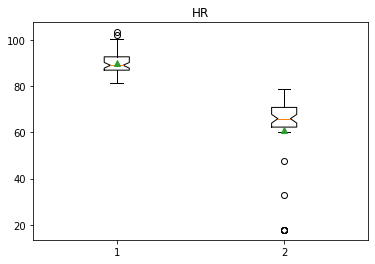

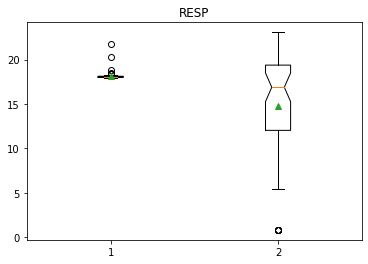

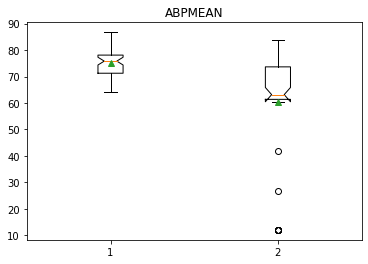

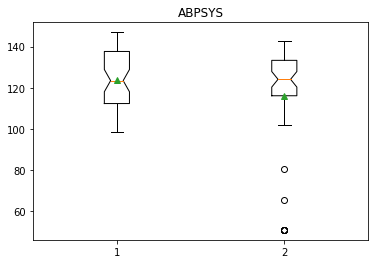

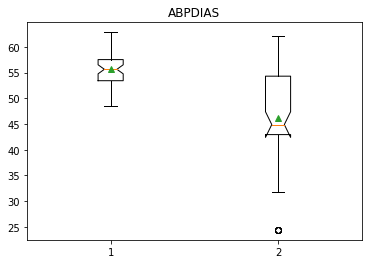

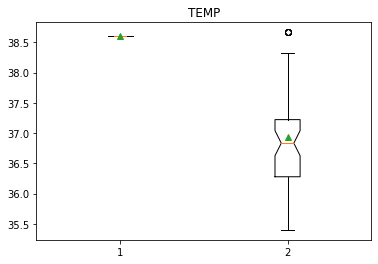

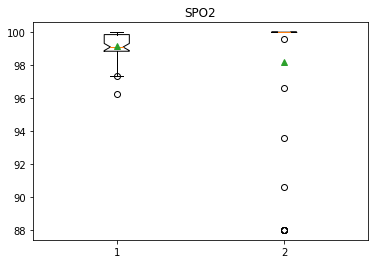

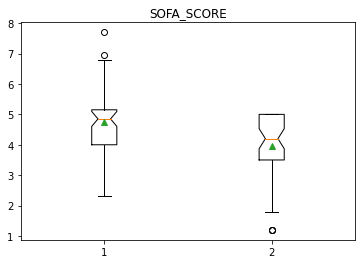

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df_box_good = df_features[(df_features['SUBJECT_ID']== 44976) ] #89906, 60
df_box_bad  = df_features[(df_features['SUBJECT_ID']== 87481)] # 73299 , 60
#print(df_box_good)

rows_good_box = int(df_box_good.shape[0])
#df_box_good = df_box_good.loc[rows_good_box - 4 : , :]

rows_bad_box = int(df_box_bad.shape[0])
#df_box_bad = df_box_bad.loc[rows_bad_box - 4 : , :]

df_box_good=df_box_good.reset_index(drop=True);
df_box_bad=df_box_bad.reset_index(drop=True);

plt.title('HR')
plt.boxplot([df_box_good['HR'],df_box_bad['HR']] , showmeans=True,  notch=True)
plt.show()


plt.title('RESP')
plt.boxplot([df_box_good['RESP'],df_box_bad['RESP']] , showmeans=True, notch=True)
plt.show()

plt.title('ABPMEAN')
plt.boxplot([df_box_good['ABPMEAN'],df_box_bad['ABPMEAN']] , showmeans=True, notch=True)
plt.show()

plt.title('ABPSYS')
plt.boxplot([df_box_good['ABPSYS'],df_box_bad['ABPSYS']] , showmeans=True,  notch=True)
plt.show()


plt.title('ABPDIAS')
plt.boxplot([df_box_good['ABPDIAS'],df_box_bad['ABPDIAS']] , showmeans=True, notch=True)
plt.show()

plt.title('TEMP')
plt.boxplot([df_box_good['TEMP'],df_box_bad['TEMP']] , showmeans=True,  notch=True)
plt.show()


plt.title('SPO2')
plt.boxplot([df_box_good['SPO2'],df_box_bad['SPO2']] , showmeans=True,notch=True)
plt.show()


plt.title('SOFA_SCORE')
plt.boxplot([df_box_good['SOFA_SCORE'],df_box_bad['SOFA_SCORE']] , showmeans=True,  notch=True)
plt.show()

# exclude the outliers



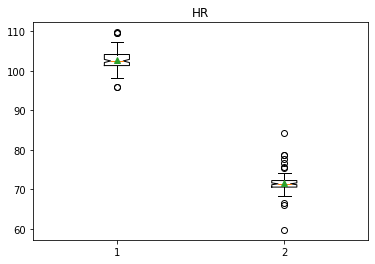

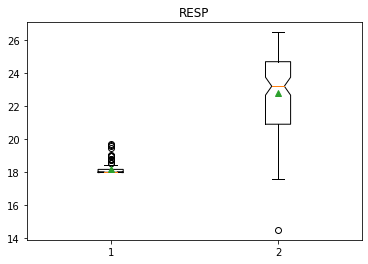

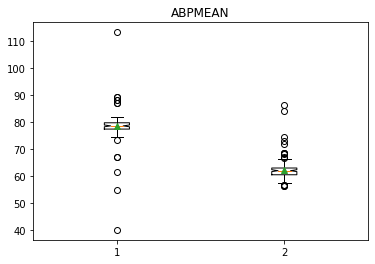

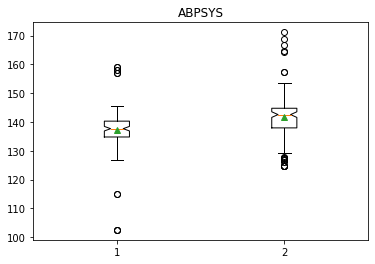

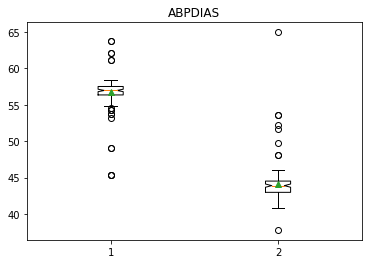

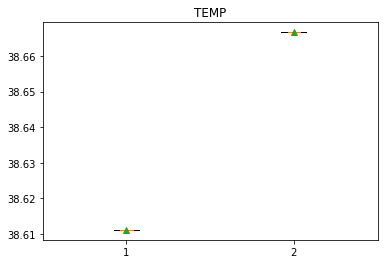

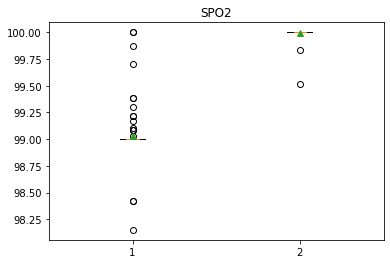

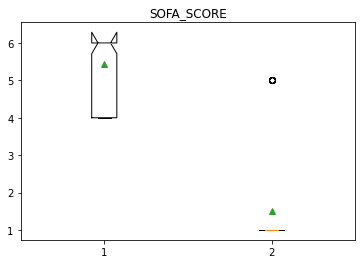

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df_box_good = df_features_sequences[(df_features_sequences['SUBJECT_ID']== 44976) ] #89906, 60
df_box_bad  = df_features_sequences[(df_features_sequences['SUBJECT_ID']== 87481)] # 73299 , 60
#print(df_box_good)

rows_good_box = int(df_box_good.shape[0])
df_box_good = df_box_good.loc[rows_good_box - 120 : , :]

rows_bad_box = int(df_box_bad.shape[0])
df_box_bad = df_box_bad.loc[rows_bad_box - 120 : , :]

df_box_good=df_box_good.reset_index(drop=True);
df_box_bad=df_box_bad.reset_index(drop=True);

plt.title('HR')
plt.boxplot([df_box_good['HR'],df_box_bad['HR']] , showmeans=True,  notch=True)
plt.show()


plt.title('RESP')
plt.boxplot([df_box_good['RESP'],df_box_bad['RESP']] , showmeans=True, notch=True)
plt.show()

plt.title('ABPMEAN')
plt.boxplot([df_box_good['ABPMEAN'],df_box_bad['ABPMEAN']] , showmeans=True, notch=True)
plt.show()

plt.title('ABPSYS')
plt.boxplot([df_box_good['ABPSYS'],df_box_bad['ABPSYS']] , showmeans=True,  notch=True)
plt.show()


plt.title('ABPDIAS')
plt.boxplot([df_box_good['ABPDIAS'],df_box_bad['ABPDIAS']] , showmeans=True, notch=True)
plt.show()

plt.title('TEMP')
plt.boxplot([df_box_good['TEMP'],df_box_bad['TEMP']] , showmeans=True,  notch=True)
plt.show()


plt.title('SPO2')
plt.boxplot([df_box_good['SPO2'],df_box_bad['SPO2']] , showmeans=True,notch=True)
plt.show()


plt.title('SOFA_SCORE')
plt.boxplot([df_box_good['SOFA_SCORE'],df_box_bad['SOFA_SCORE']] , showmeans=True,  notch=True)
plt.show()

# exclude the outliers



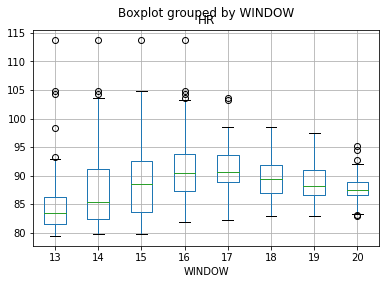

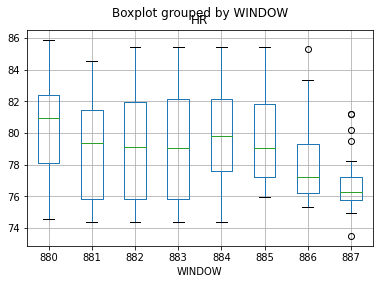

In [ ]:
 
df_box_good = df_features_sequences[(df_features_sequences['SUBJECT_ID']== 85892) ]
df_box_bad  = df_features_sequences[(df_features_sequences['SUBJECT_ID']== 81193)]
#print(df_box_good)

rows_good_box = int(df_box_good.shape[0])
df_box_good = df_box_good.loc[rows_good_box - 60 : , :]

rows_bad_box = int(df_box_bad.shape[0])
df_box_bad = df_box_bad.loc[rows_bad_box - 60 : , :]

df_box_good=df_box_good.reset_index(drop=True);
df_box_bad=df_box_bad.reset_index(drop=True);

df_box_good.boxplot(column = 'HR', by = 'WINDOW');
plt.show()
df_box_bad.boxplot(column = 'HR', by = 'WINDOW');
plt.show()

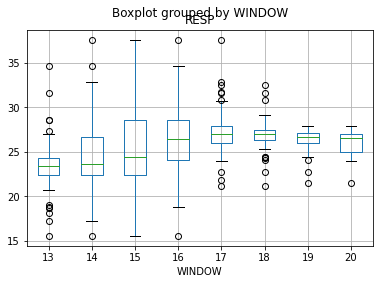

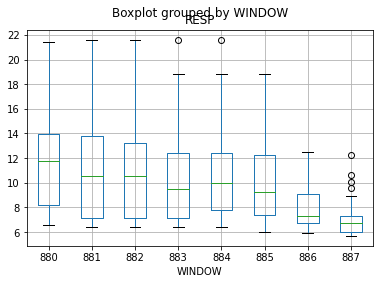

In [ ]:

df_box_good = df_features_sequences[(df_features_sequences['SUBJECT_ID']== 85892) ]
df_box_bad  = df_features_sequences[(df_features_sequences['SUBJECT_ID']== 81193)]
#print(df_box_good)

rows_good_box = int(df_box_good.shape[0])
df_box_good = df_box_good.loc[rows_good_box - 480 : , :]

rows_bad_box = int(df_box_bad.shape[0])
df_box_bad = df_box_bad.loc[rows_bad_box - 480 : , :]

df_box_good=df_box_good.reset_index(drop=True);
df_box_bad=df_box_bad.reset_index(drop=True);


df_box_good.boxplot(column = 'RESP', by = 'WINDOW');
plt.show()
df_box_bad.boxplot(column = 'RESP', by = 'WINDOW');
plt.show()

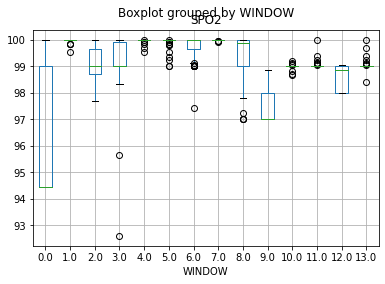

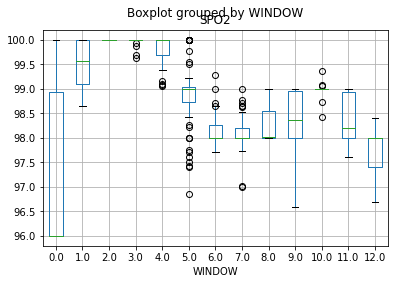

In [ ]:


df_features_sequences[(df_features_sequences['SUBJECT_ID']== 96324) ].boxplot(column = 'SPO2', by = 'WINDOW');
plt.show()
df_features_sequences[(df_features_sequences['SUBJECT_ID']== 87481)].boxplot(column = 'SPO2', by = 'WINDOW');
plt.show()

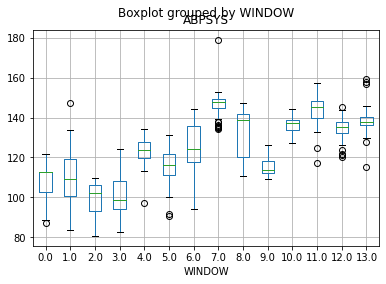

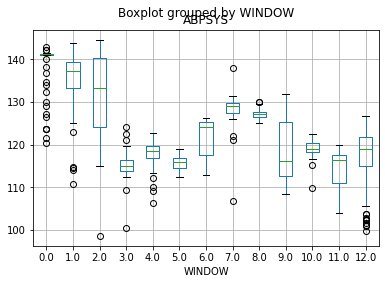

In [ ]:


df_features_sequences[(df_features_sequences['SUBJECT_ID']== 96324) ].boxplot(column = 'ABPSYS', by = 'WINDOW');
plt.show()
df_features_sequences[(df_features_sequences['SUBJECT_ID']== 87481)].boxplot(column = 'ABPSYS', by = 'WINDOW');
plt.show()

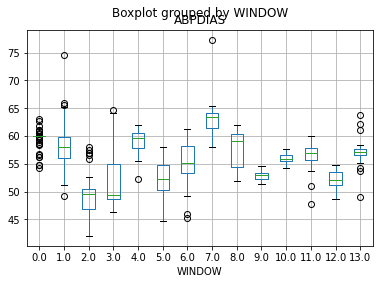

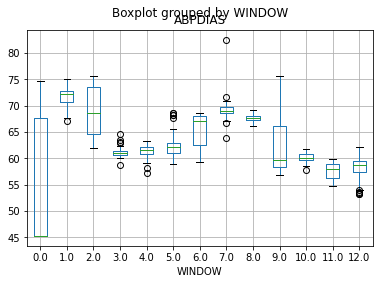

In [ ]:

df_features_sequences[(df_features_sequences['SUBJECT_ID']== 96324) ].boxplot(column = 'ABPDIAS', by = 'WINDOW');
plt.show()
df_features_sequences[(df_features_sequences['SUBJECT_ID']== 87481)].boxplot(column = 'ABPDIAS', by = 'WINDOW');
plt.show()

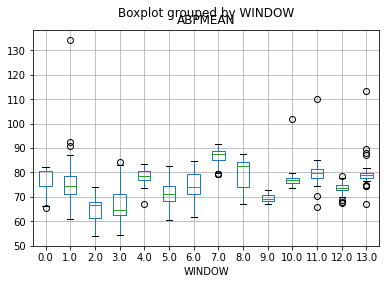

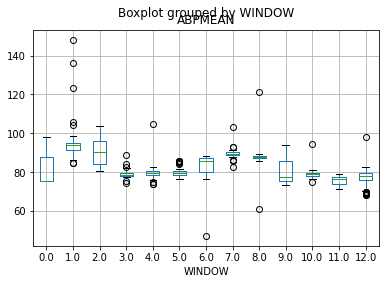

In [ ]:


df_features_sequences[(df_features_sequences['SUBJECT_ID']== 96324) ].boxplot(column = 'ABPMEAN', by = 'WINDOW');
plt.show()
df_features_sequences[(df_features_sequences['SUBJECT_ID']== 87481)].boxplot(column = 'ABPMEAN', by = 'WINDOW');
plt.show()

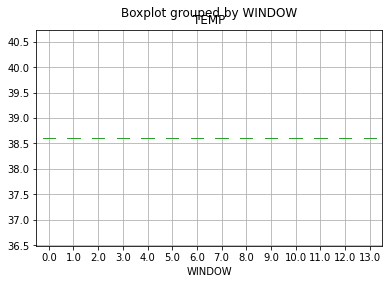

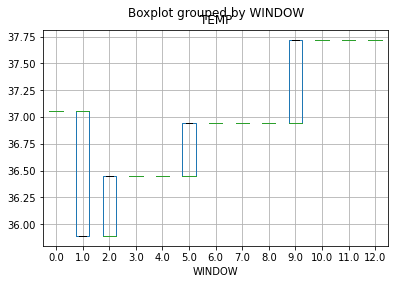

In [ ]:


df_features_sequences[(df_features_sequences['SUBJECT_ID']== 96324) ].boxplot(column = 'TEMP', by = 'WINDOW');
plt.show()
df_features_sequences[(df_features_sequences['SUBJECT_ID']== 87481)].boxplot(column = 'TEMP', by = 'WINDOW');
plt.show()

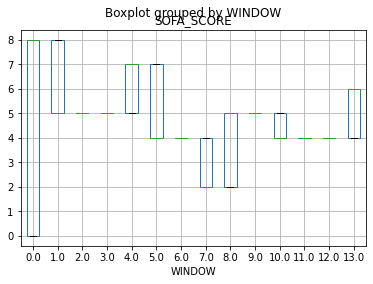

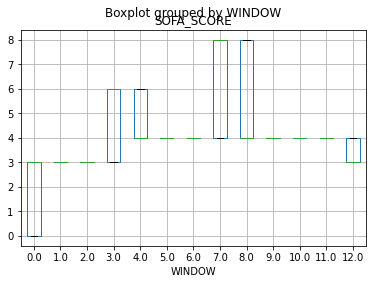

In [ ]:


df_features_sequences[(df_features_sequences['SUBJECT_ID']== 96324) ].boxplot(column = 'SOFA_SCORE', by = 'WINDOW');
plt.show()
df_features_sequences[(df_features_sequences['SUBJECT_ID']== 87481)].boxplot(column = 'SOFA_SCORE', by = 'WINDOW');
plt.show()